In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Problem: Walmart mağazasının satış verilerinin durağan olup olmadığı

In [10]:
walmart = pd.read_csv("Walmart_Sales.csv")
df = walmart.copy()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [13]:
df["Date"] = pd.to_datetime(df["Date"], format= "%d-%m-%Y")
df["Date"]

0      2010-02-05
1      2010-02-12
2      2010-02-19
3      2010-02-26
4      2010-03-05
          ...    
6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [21]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Zaman Serisi Görselleştirme

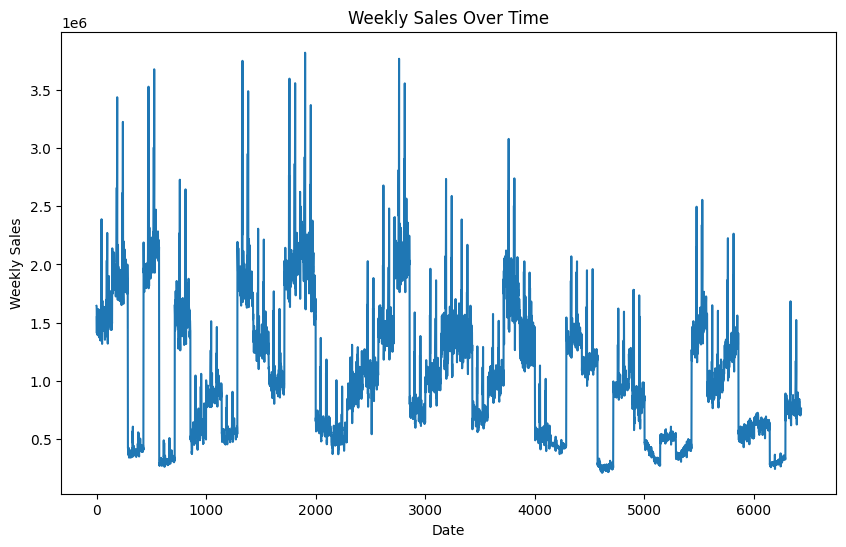

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Augmented Dickey-Fuller Unit Root Test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [25]:
stat, p, lags, obs, crit, t = adfuller(df["Weekly_Sales"])

print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
 print('Probably not Stationary')
else:
 print('Probably Stationary')

stat=-4.624, p=0.00012
Probably Stationary


# Kwiatkowski-Phillips-Schmidt-Shin

In [22]:
from statsmodels.tsa.stattools import kpss

In [24]:
stat, p, lags, crit = kpss(df["Weekly_Sales"])

print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
 print('Probably Stationary')
else:
 print('Probably not Stationary')

stat=1.846, p=0.01000
Probably not Stationary


C:\Users\Eren\AppData\Local\Temp\ipykernel_16836\3364128554.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p, lags, crit = kpss(df["Weekly_Sales"])
